In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import yfinance as yfin

import requests
import xlsxwriter
from datetime import date

#import oneMonthRet ##oneMonthRet is a module which reurns the return percentage

In [2]:
# import vaex
# df_vx=vaex.open('NIFTY50.csv')

In [3]:
# AUBANK
# AXISBANK
# BANDHANBNK
# FEDERALBNK
# HDFCBANK
# ICICIBANK
# IDFCFIRSTB
# INDUSINDBK
# KOTAKBANK
# PNB
# RBLBANK
# SBIN

In [4]:
### This function returns the data for a certain duration of time @@@@@@@@@@@@@
#################@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
def company(name,duration,start,end):
    yfin
    # name = 'HDFCLIFE.NS'
    ticker = yfin.Ticker(name)
    print(ticker)
    if (len(start)!= 0 and len(end)!=0):
        data=ticker.history(start=start,end=end)
#         data=ticker.history(start='2020-11-15',end='2020-12-31')
    else:
        data=ticker.history(period=duration)
    #     data_2y=ticker.history(period='2y')
    # return data
        # ticker.info
        # ticker.financials
    month=data.index.month
    month=month.value_counts().index
    month=month.sort_values(ascending=True)
    year=data.index.year
    year= year.value_counts().index
    year=year.sort_values(ascending=True)
    return (data,ticker,year,month)

In [5]:
def percDiff(a,b):
    perc= ((b-a)*100)/a
    return perc

In [6]:
def monthlyAnalysis(data):
    data.dropna()
    mn=[] #month min val
    mx=[] #month max val
    minMaxRet=[]
    mx_dt=[]
    mn_dt=[]
    mnth_close=[] #month close val
    mnth_open=[] #month open val
    OpMaxRet=[]
    OpMinRet=[]
    OpCloseRet=[]
    data_monthly=[]
    up_days=[]
    down_days=[]
    yr=data.index.year
    yr=yr.value_counts().index
    yr=yr.sort_values(ascending=True)
    
    month_data=data.index.month
    month_data=month_data.value_counts().index
    month_data=month_data.sort_values(ascending=True)
    
    #mnth=[1,2,3,4,5,6,7,8,9,10,11,12]
    #mnth=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
   
    for i in range(0,len(yr)):
        for j in range(0,len(month_data)):
            x_open=[]
            x_close=[]
            up=[]
            down=[]
            iCnt=0
            iCnt_up=0
            for k in range(0,len(data)):
                if (data.index.year[k]==yr[i]):
                    if (data.index.month[k]==month_data[j]):
                        iCnt+=1
#                         if i==0:
#                             x_open.append(data['Open'][k])
#                         else:
#                             x_open.append(data['Close'][k-1])
                        x_open.append(data['Open'][k])
                        x_close.append(data['Close'][k])
                        #x_close.append({'close':data['Close'][k],'date':data.index.date[k]})
                        if (k+1<len(data) and (int(data['Close'][k+1])>int(data['Close'][k]))):
                            iCnt_up+=1
            if (len(x_open)>0 and len(x_close)>0):
                up=iCnt_up
                down=iCnt-iCnt_up
                mnth_open=x_open[0]
                mnth_close=x_close[len(x_close)-1]
                mn=min(x_close)
                #print(x_close[x_close['close']==min(x_close['close'])])
                #mn=x_close[x_close['close']==max(x_close['close'])]
                mx=max(x_close)
                minMaxRet=percDiff(min(x_close),max(x_close))
                OpMaxRet=percDiff(x_open[0],max(x_close))
                OpMinRet=percDiff(x_open[0],min(x_close))
                OpCloseRet=percDiff(x_open[0],x_close[len(x_close)-1])
                data_monthly.append({'Year':yr[i],'Month':month_data[j],'Open':mnth_open,'Close':mnth_close,'Min':mn,'Max':mx,
                                      'Min-Max':minMaxRet,'Open-Max':OpMaxRet,'Open-Min':OpMinRet,'Open-Close':OpCloseRet,
                                        'No.ofDaysUp':up,'No.ofDaysDown':down})   
    
    return data_monthly

In [12]:
## ^NSEI, ^NSEBANK,^CNXIT,^CNXMETAL,^CNXFMCG, ^CNXAUTO, ^CNXPHARMA ^CNXREALTY, ^CNXCONSUM, ^CNXCMDT, ^CNXPSUB, ^CNXFIN
## ^NSEMDCP50, ^CNXSC
data_nse,ticker_nse,year_nse,month_nse=company('^CNXSC','1mo','2021-08-01','2021-12-31')
data_monthly_nse=monthlyAnalysis(data_nse)
df_monthly_nse=pd.DataFrame(data_monthly_nse)
df_monthly_nse
# df_monthly_nse[df_monthly_nse['Month']==7]

yfinance.Ticker object <^CNXSC>


,Year,Month,Open,Close,Min,Max,Min-Max,Open-Max,Open-Min,Open-Close,No.ofDaysUp,No.ofDaysDown
0,2021,8,10342.75,10097.25,10097.25,10097.25,0.0,-2.373643,-2.373643,-2.373643,0,1


In [8]:
def maxRet_year(data):
    data.dropna()
    x=[]
    ##@@@@ getting the max-min data for each year @@@@##############
    yr=data.index.year
    yr= yr.value_counts().index
    yr=yr.sort_values(ascending=True)
    # print(data.index.year.value_counts())
    closeVal=[]
    mx=[]
    mn=[]
    mx_dt=[] ##for storing dates when max occurs
    mn_dt=[] ##for storing dates when min occurs
    yr_end_ret=[]
    yr_open=[]
    yr_end=[]
    fy_ret=[]
    dt=[]
    open_max=[]
    cls_dict=[] ##used for storing the date at which max,min happens
    print(yr)
    for i in range(0,len(yr)):
        dt_FY_mar=[]  ##to get the last trading session date in march
        dt_FY_apr=[]  ## to get the first trading session date in april ##not hard coded as date need not be 01 due to sat/sun/holidays etc..
        for j in range(0,len(data)):
            if data.index.year[j] == yr[i]:
                dt.append(data.index.date[j])
                cls_dict.append({'dt':data.index.date[j],'close':data['Close'][j],'open':data['Open'][j]}) ##dictionary for storing dates of min/max
                closeVal.append(data['Close'][j])
                
                if(data.index.month[j]==4):  ######this line is added to calculate the FY beginning i.e first trading session of April
                    dt_FY_apr.append(data.index.date[j])
            elif (i<len(yr)-1):
                if(data.index.year[j]== yr[i+1] and data.index.month[j]==3): ######this line is added to calculate the FY end i.e last trading session of march of succeding yr
                    dt_FY_mar.append(data.index.date[j])
        
        mx.append(max(closeVal))
        mn.append(min(closeVal))
        #######Start:calculating FY return calculations: April-Mar######################
        if i<len(yr)-1 :
            if len(dt_FY_mar)!=0 and len(dt_FY_apr)!=0:
                fy_x=data[(data.index==str(min(dt_FY_apr)))]['Open'][0]
                fy_y=data[(data.index==str(max(dt_FY_mar)))]['Close'][0]            
                fy_ret.append(percDiff(fy_x,fy_y))
            else:
                fy_ret.append(0)
        ##################################END#############################################
        
        ###running the loop to get the dates of min@max value in the year
        unique_Mxcnt=0 ### to avoid counting mx/min multiple times. There are data which has more than 1 time same min/max values
        unique_Mncnt=0
        x=0
        y=0
        dt_mx=''
        dt_mn=''
        for n in range(0,len(closeVal)):
            if cls_dict[n]['close']==max(closeVal) and unique_Mxcnt==0:
                mx_dt.append(cls_dict[n]['dt'])
                dt_mx=cls_dict[n]['dt']
                unique_Mxcnt=1
                #print(cls_dict[n]['dt'],'max')
            elif cls_dict[n]['close']==min(closeVal) and unique_Mncnt==0:
                mn_dt.append(cls_dict[n]['dt'])
                dt_mn=cls_dict[n]['dt']
                unique_Mncnt=1
            
            
            if cls_dict[n]['dt']==min(dt):
                yr_open.append(cls_dict[n]['open'])
                x=cls_dict[n]['open']
                #print(cls_dict[n])
            if cls_dict[n]['dt']==max(dt):
                yr_end.append(cls_dict[n]['close'])
                y=cls_dict[n]['close']
                #print(cls_dict[n])
                #print(cls_dict[n]['dt'],'min')
        yr_end_ret.append(percDiff(x,y))
        open_max.append(percDiff(x,max(closeVal)))
        #print(yr_end_ret)
        ###################################################
        closeVal=[]
        cls_dict=[]
        dt=[]
    
    fy_ret.append(0) ### appending 0 as the latest fiscal return will not be available
    
    max_percRet=[]
    for k in range(0,len(yr)):
        max_percRet.append((mx[k]-mn[k])*100/mn[k])

    dict1={'Year':yr,'Max':mx,'Min':mn,'Min-Max Return':max_percRet,'Open-Max Ret':open_max,'Max_Date':mx_dt,'Min_Date':mn_dt,'Yr Open':yr_open,'Yr Close':yr_end,'Jan-Dec Ret':yr_end_ret,'Apr-Mar(FY)':fy_ret}
    df=pd.DataFrame(dict1).sort_values(by=['Year'])
    df.reset_index(drop=True,inplace=True)
    #print(mx_dt,'\n',mn_dt)
    #plt.subplot(2, 2, 1)
    plt.scatter(yr,mx,label='Max')
    plt.scatter(yr,mn,label='MIN')
    plt.scatter(yr,yr_open,label='Open Price')
    #plt.subplot(2, 2, 2)
    
    return df


##@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@##########################

In [9]:
def pksAndValley(data1,df1):    
    from datetime import datetime
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import find_peaks

    ##@@@@@@@@@@@to store dynamically the peak values for all the years@@@@@@@@@@@@@@@@@

    yr=data1.index.year
    yr=yr.value_counts().index.sort_values(ascending=True)
    pks=[]
    for i in range(0,len(yr)):
    #     print(data1[(data1.index.year>'2020')])
        if(i<len(yr)-1):
            x = data1[(data1.index> datetime.strptime(str(yr[i])+'-01-01','%Y-%m-%d')) & 
                  (data1.index<datetime.strptime(str(yr[i+1])+'-01-01','%Y-%m-%d'))]['Close']
        else:
            x = data1[(data1.index> datetime.strptime(str(yr[i])+'-01-01','%Y-%m-%d')) & 
                  (data1.index<datetime.strptime(str(yr[i]+1)+'-01-01','%Y-%m-%d'))]['Close']
        x.reset_index(inplace=True,drop=True)
        peaks, _=find_peaks(x,prominence=20)

        plt.figure(figsize=(20,10))
        plt.legend([yr[i]])
        plt.subplot(3, 1, 1)
        plt.plot(peaks, x[peaks], "ob"); plt.plot(x); plt.legend(['prominence',yr[i]])
    #     print(peaks, yr[i])
        pks.append(peaks)
    pks
    # print(pks[0],"--pks1")

    # plt.figure(figsize=(20,10))
    # plt.subplot(3, 3, 1)
    # plt.plot(pks[0], x[pks[0]], "ob"); plt.plot(x); plt.legend(['prominence'])
    # plt.plot(pks[1], x[pks[1]], "ob"); plt.plot(x); plt.legend(['prominence'])

    plt.show()


yfinance.Ticker object <^NSEI>
yfinance.Ticker object <^NSEBANK>
yfinance.Ticker object <^CNXIT>
yfinance.Ticker object <^CNXMETAL>
Int64Index([2021], dtype='int64')


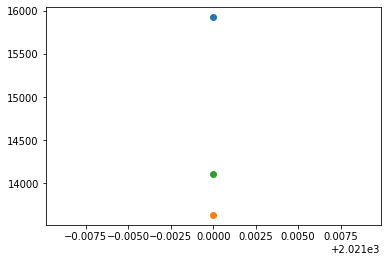

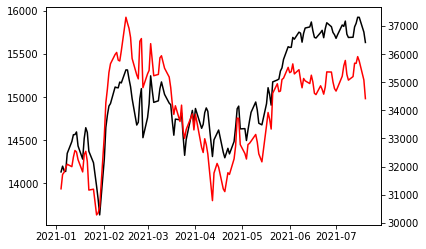

In [12]:
# ^NSEI, ^NSEBANK,^CNXIT,^CNXMETAL,^CNXFMCG, ^CNXAUTO, ^CNXPHARMA ^CNXREALTY, ^CNXCONSUM, ^CNXCMDT, ^CNXPSUB, ^CNXFIN
# ^NSEMDCP50, ^CNXSC
data_nse,ticker2,year2,month2=company('^NSEI','','2021-01-01','2021-12-31')
data_bank,ticker2,year2,month2=company('^NSEBANK','','2021-01-01','2021-12-31')
data_IT,ticker2,year2,month2=company('^CNXIT','','2021-01-01','2021-12-31')
data_metal,ticker2,year2,month2=company('^CNXMETAL','','2021-01-01','2021-12-31')
data2=maxRet_year(data_nse)
# pksAndValley(data2,df2)
data2
# plt.plot(data_nse.index.date,data_nse['Close'])
# plt.plot(data_nse.index.date,data_nse['Close'],color='green')
# plt.plot(data_nse.index.date,data_bank['Close'],color='red')
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(data_nse['Close'], color='black')
ax_right.plot(data_bank['Close'], color='red')